In [2]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

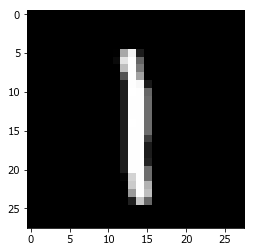

In [5]:
plt.imshow(x_train[14],cmap='gist_gray')

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
x_trainn=[]
x_testt=[]
for i in range(len(x_train)):
    x_trainn.append(np.ravel(x_train[i]))
for i in range(len(x_test)):
    x_testt.append(np.ravel(x_test[i]))

x_trainn=np.array(x_trainn).astype(np.float32)
x_testt=np.array(x_testt).astype(np.float32)


In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
clf=OneHotEncoder()
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)


In [9]:
y_train=clf.fit_transform(y_train).toarray().astype(np.float32)
y_test=clf.transform(y_test).toarray().astype(np.float32)


In [10]:
x_input=tf.placeholder(tf.float32,[None,784],name="Features")

In [11]:
y_input=tf.placeholder(tf.float32,[None,10],name="Labels")

In [12]:
w=tf.cast(tf.Variable(tf.zeros((784,10))),tf.float32)
b=tf.cast(tf.Variable(tf.zeros((10))),tf.float32)

In [13]:
y_pred=tf.add(tf.matmul(x_input,w),b)

In [14]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_input,logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [17]:
optim=tf.train.GradientDescentOptimizer(learning_rate=0.5,)
train=optim.minimize(loss)
init_op=tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(50000):
        x_in=[np.random.randint(0,60000) for i in range(32)]
        X=[x_trainn[i] for i in x_in]
        Y=[y_train[i] for i in x_in]
        sess.run(train,feed_dict={x_input:X,y_input:Y})
    accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_pred,1),tf.argmax(y_test,1)),tf.float32))
    print(sess.run(accuracy,feed_dict={x_input:x_testt,y_input:y_test}))
        
        
        
        
        

0.9104
